## Visualizing filters and features - 21BAI1007

In [ ]:
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Convolution2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [ ]:
seed = 7
numpy.random.seed(seed)

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
(x_train, y_train1), (x_test, y_test1) = mnist.load_data()

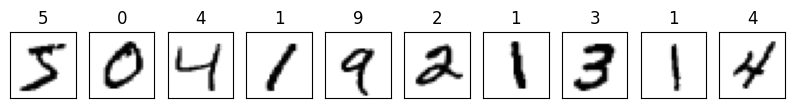

In [ ]:
fig, ax = plt.subplots(1, 10, figsize=(10, 10))
for i in range(0, 10):
    ax[i].xaxis.set_visible(False)
    ax[i].yaxis.set_visible(False)
    ax[i].set_title(y_train1[i])
    ax[i].imshow(x_train[i], cmap=plt.cm.binary)

def baseline_model():
    model = Sequential()
    model.add(Convolution2D(32, (5, 5), padding='valid', strides=(1,1), input_shape=(28,28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(1152, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 105s - loss: 0.1722 - accuracy: 0.9491 - val_loss: 0.0490 - val_accuracy: 0.9840 - 105s/epoch - 350ms/step
Epoch 2/10
300/300 - 96s - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0439 - val_accuracy: 0.9859 - 96s/epoch - 321ms/step
Epoch 3/10
300/300 - 95s - loss: 0.0323 - accuracy: 0.9897 - val_loss: 0.0288 - val_accuracy: 0.9908 - 95s/epoch - 317ms/step
Epoch 4/10
300/300 - 95s - loss: 0.0244 - accuracy: 0.9920 - val_loss: 0.0365 - val_accuracy: 0.9887 - 95s/epoch - 317ms/step
Epoch 5/10
300/300 - 96s - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0316 - val_accuracy: 0.9907 - 96s/epoch - 320ms/step
Epoch 6/10
300/300 - 94s - loss: 0.0144 - accuracy: 0.9955 - val_loss: 0.0377 - val_accuracy: 0.9879 - 94s/epoch - 313ms/step
Epoch 7/10
300/300 - 96s - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0390 - val_accuracy: 0.9891 - 96s/epoch - 320ms/step
Epoch 8/10
300/300 - 95s - loss: 0.0106 - accuracy: 0.9966 - val_loss: 0.0363 - val_accuracy: 0.9894 - 95s/epoch - 3

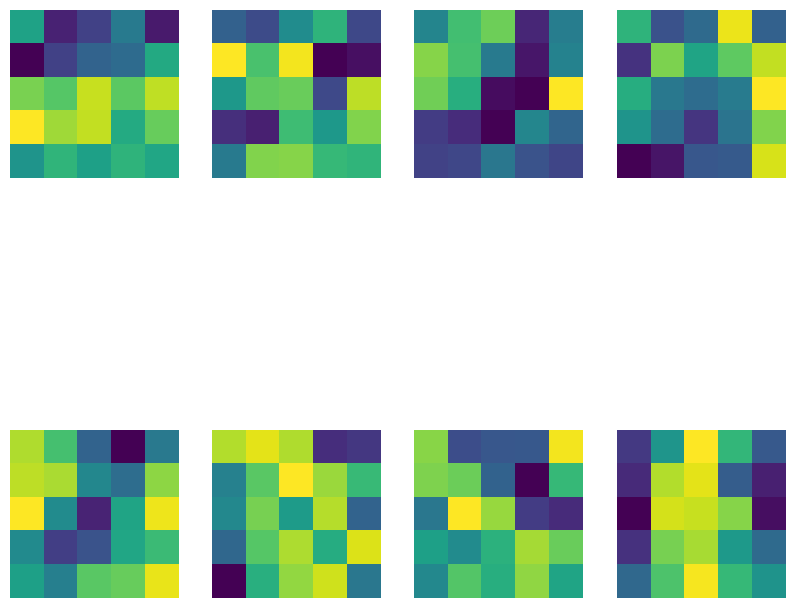

1/1 [==============================] - 0s 133ms/step


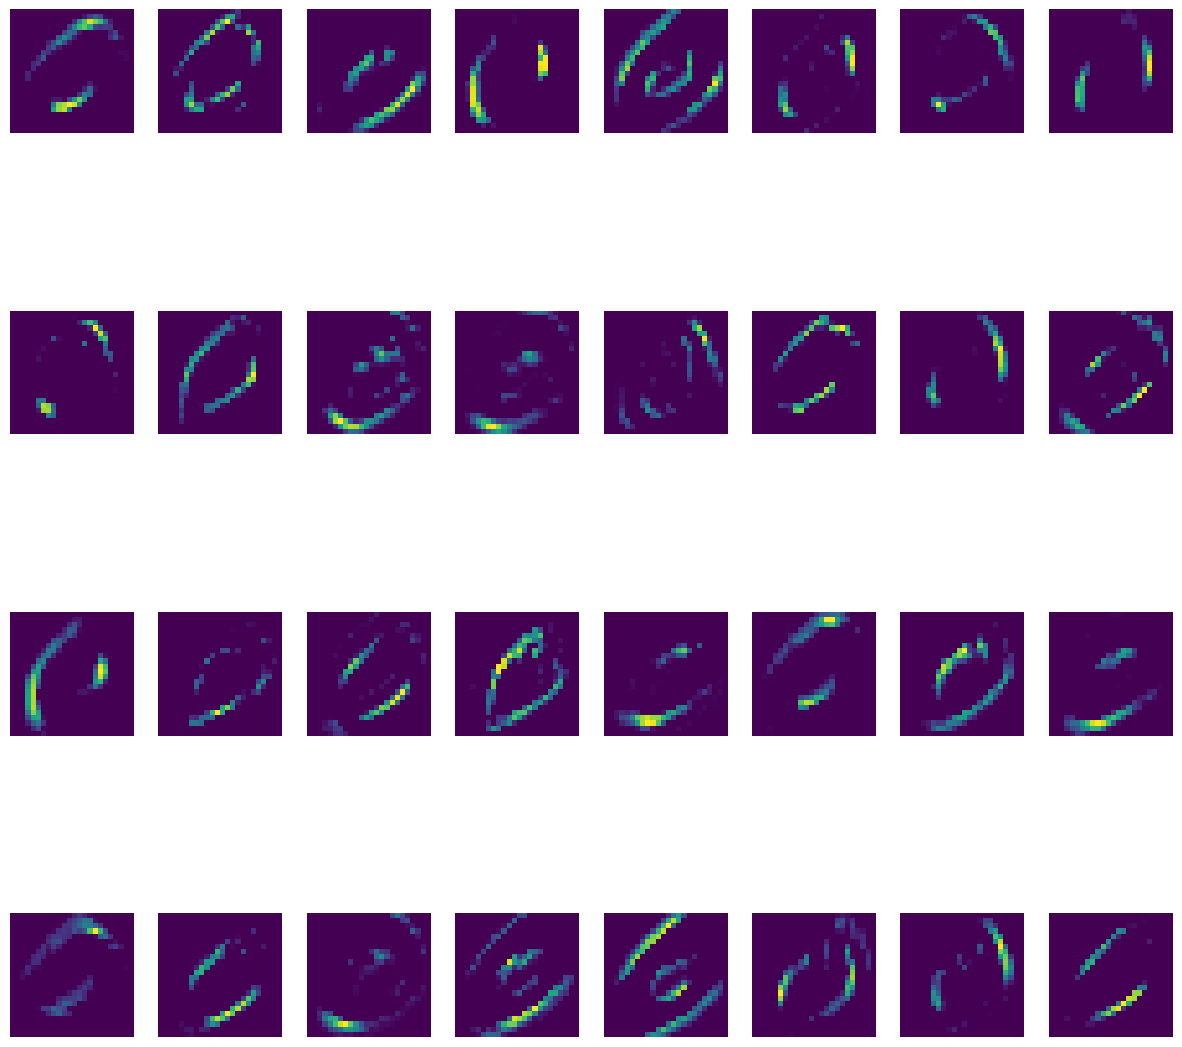

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model

def visualize_filters(model, layer_name, n_filters=8, filter_size=(3, 3), figsize=(10, 10)):
    layer = model.get_layer(layer_name)
    filters = layer.get_weights()[0]

    if len(filters.shape) == 3:
        filters = np.expand_dims(filters, axis=-1)

    plt.figure(figsize=figsize)

    for i in range(n_filters):
        plt.subplot(n_filters // 4, 4, i + 1)
        plt.imshow(filters[:, :, 0, i], cmap='viridis')
        plt.axis('off')

    plt.show()

def visualize_feature_maps(model, layer_name, input_image):
    layer = model.get_layer(layer_name)
    intermediate_model = Model(inputs=model.input, outputs=layer.output)

    input_image = np.expand_dims(input_image, axis=0)
    feature_maps = intermediate_model.predict(input_image)

    n_features = feature_maps.shape[-1]
    plt.figure(figsize=(15, 15))

    for i in range(n_features):
        plt.subplot(n_features // 8, 8, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.show()


visualize_filters(model, 'conv2d_1')


image_to_visualize = X_test[0]
visualize_feature_maps(model, 'conv2d_1', X_train[1])
